cvcでどういう分布化を確認する



In [1]:
import ast
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/data/df_train2.csv')
df_anot = pd.read_csv('/data/train_annotations.csv')
df_bifurcation = pd.read_csv('/data/additional/RANZCR_CLiP_tracheal_bifurcation.csv')
df_cvc = pd.read_csv('/data/additional/cvc_malposition_categories.csv')

In [3]:
cvc_cols = ["CVC - Abnormal", "CVC - Borderline", "CVC - Normal"]

In [4]:
df["is_cvc"] = df[cvc_cols].max(1)

In [11]:
df["CVC - Abnormal"].value_counts()

0    26888
1     3195
Name: CVC - Abnormal, dtype: int64

In [10]:
df["CVC - Borderline"].value_counts()

0    21623
1     8460
Name: CVC - Borderline, dtype: int64

In [8]:
df["CVC - Normal"].value_counts()

1    21324
0     8759
Name: CVC - Normal, dtype: int64

CVCの先端を自分で見つけ出すことは可能かな？

必要なところだけをピックアップ

# 手動ラベリングとか

In [120]:
def plot_xray(StudyInstanceUID, label):
    """
    intubation as green
    bifurcation as red
    """
    img = cv2.imread('/data/train/'+StudyInstanceUID+'.jpg')
    intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])
    for i in range(len(intubation)):
        img = cv2.circle(img, tuple(intubation[i]), 10, (0,255,0), 10)
        img = cv2.putText(img, str(i), (intubation[i][0]-10, intubation[i][1]-10), cv2.FONT_HERSHEY_PLAIN, fontScale=5, color=(255, 0, 0), thickness=2)
    img = cv2.circle(img, (img.shape[1]//2, img.shape[0]//2), 10, (0,0,255), 10)
    plt.figure(figsize=(12,12))
    plt.title(f'label: {label}')
    plt.imshow(img)
    
def save_xray(StudyInstanceUID, label):
    """
    intubation as green
    bifurcation as red
    """
    img = cv2.imread('/data/train/'+StudyInstanceUID+'.jpg')
    intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])
    for i in range(len(intubation)):
        img = cv2.circle(img, tuple(intubation[i]), 10, (0,255,0), 10)
        img = cv2.putText(img, str(i), (intubation[i][0]-10, intubation[i][1]-10), cv2.FONT_HERSHEY_PLAIN, fontScale=5, color=(255, 0, 0), thickness=2)
    img = cv2.circle(img, (img.shape[1]//2, img.shape[0]//2), 10, (0,0,255), 10)
    plt.figure(figsize=(12,12))
    plt.title(f'label: {label}')
    plt.imshow(img)
    plt.savefig(f"/data/eda_plot/cvc_tube/{StudyInstanceUID}_{label}.jpeg")
    plt.close()

In [115]:
df_cvc = df[df.is_cvc == 1]

In [116]:
cvc_study_id = df_cvc.StudyInstanceUID.values

In [117]:
df_anot_cvc = df_anot[df_anot.label.isin(cvc_cols)]

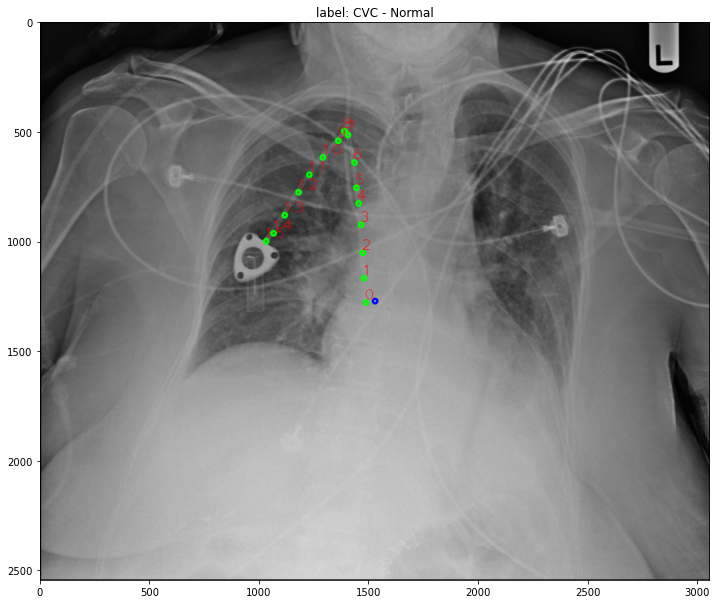

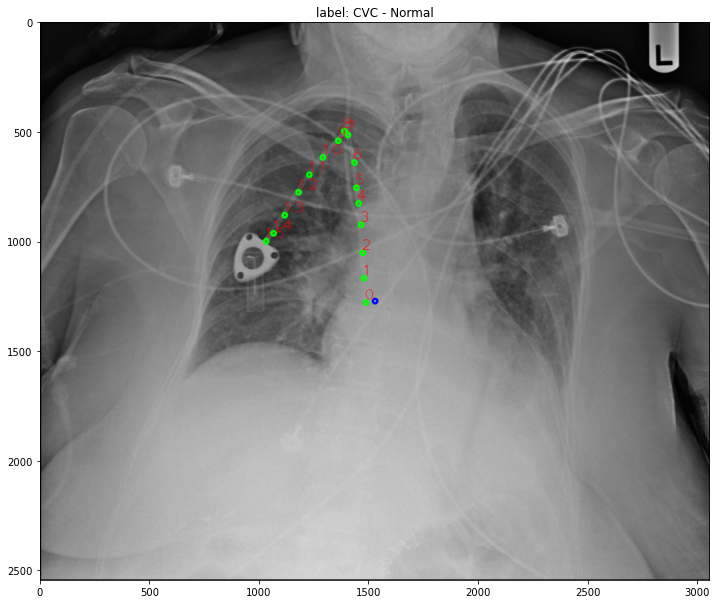

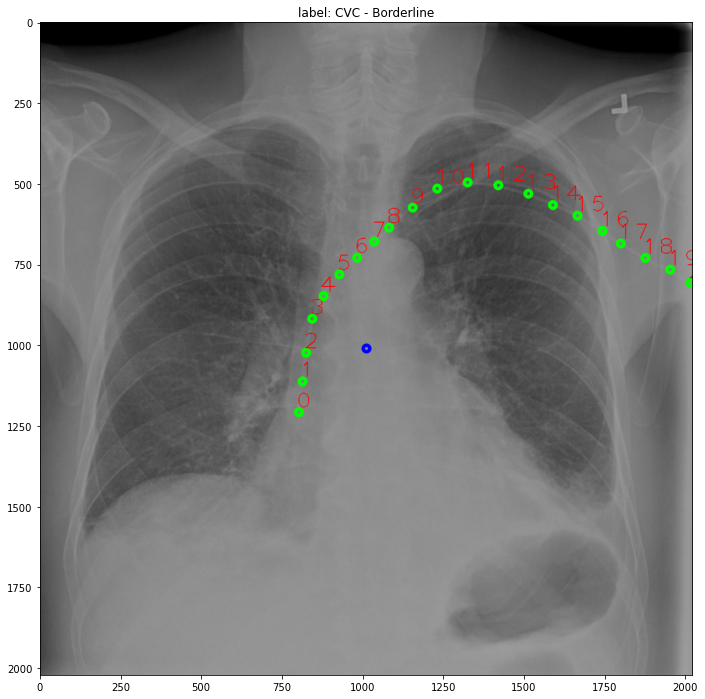

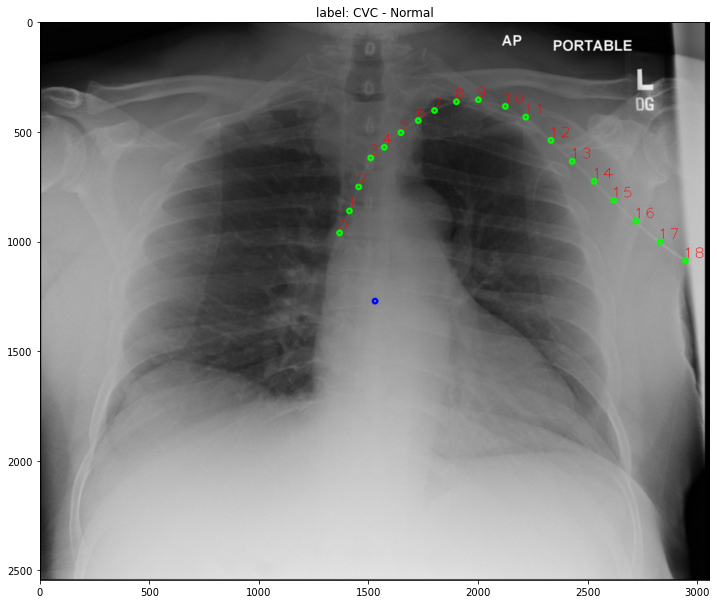

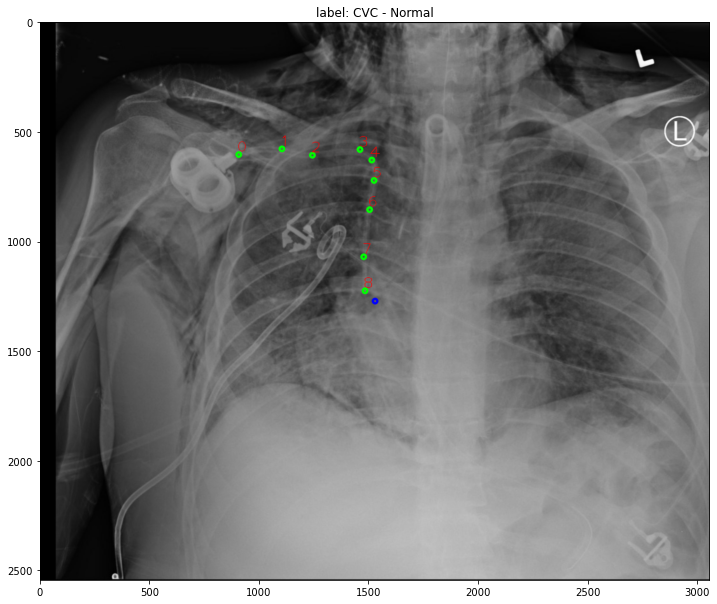

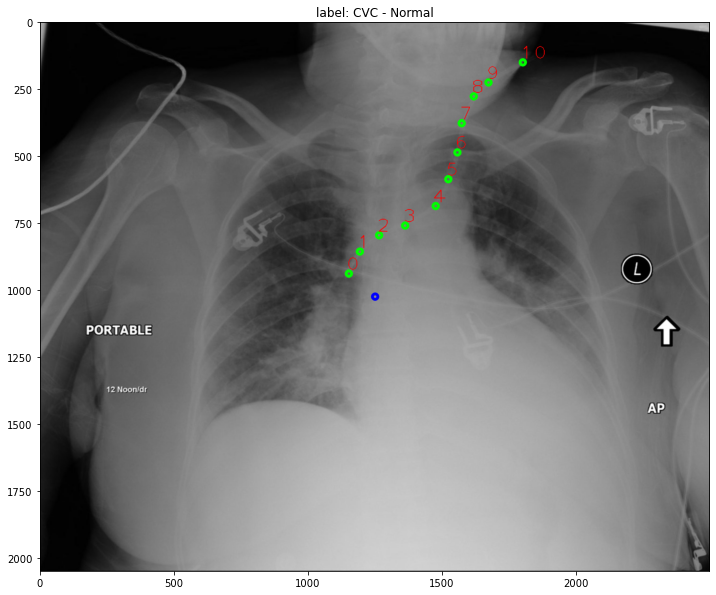

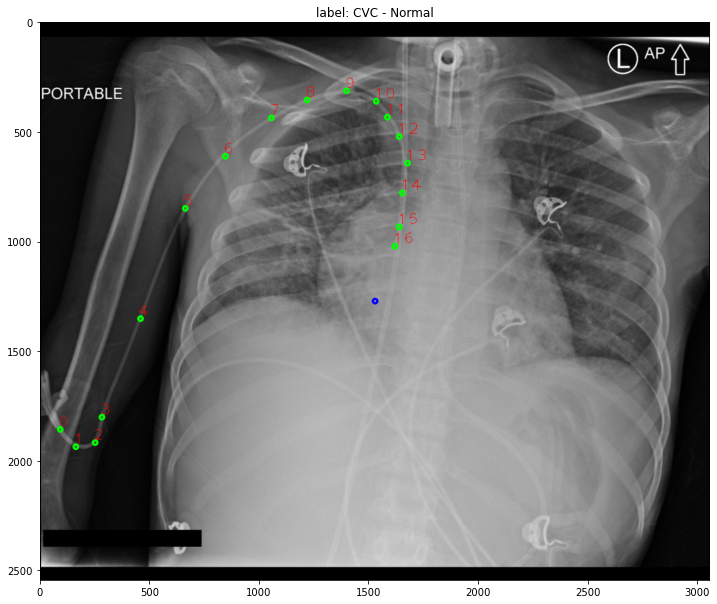

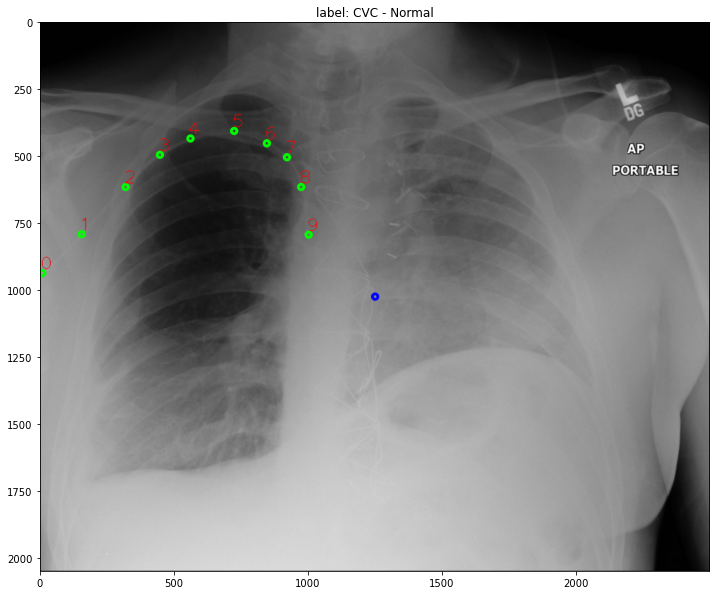

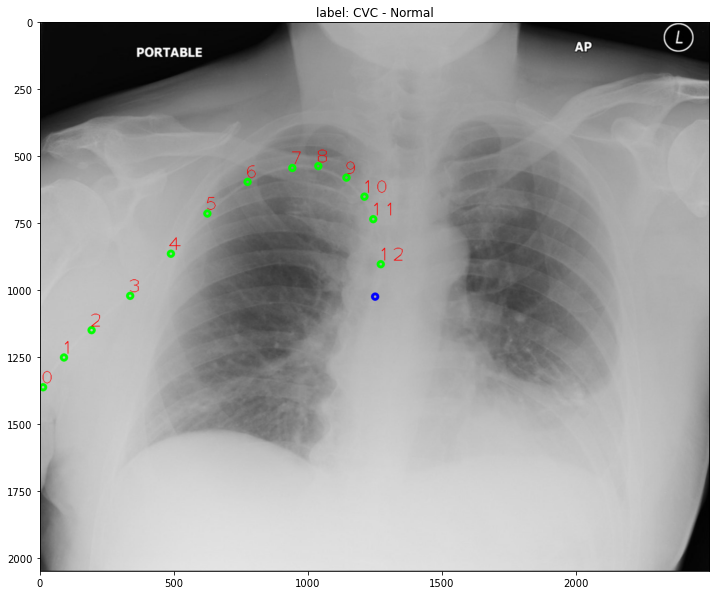

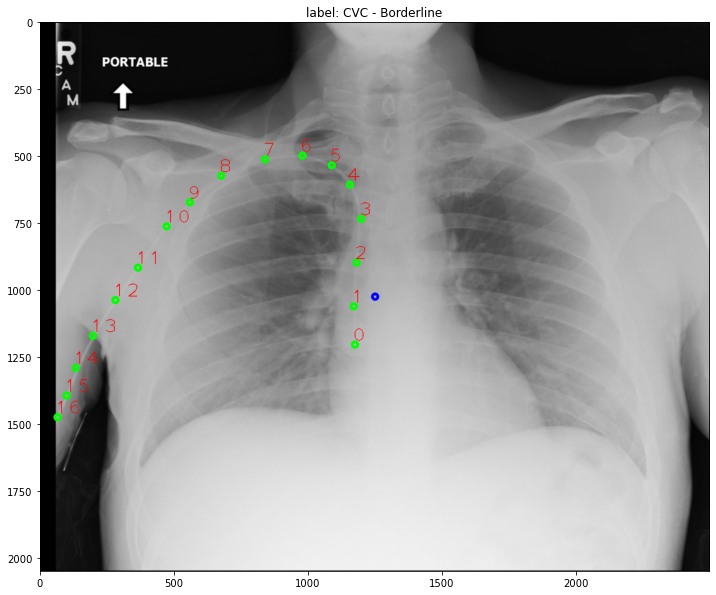

In [118]:
for i in range(10):
    ind = i
    row = df_anot_cvc.iloc[ind]
    plot_xray(row.StudyInstanceUID, row.label)

In [121]:
for i in range(10):
    ind = i
    row = df_anot_cvc.iloc[ind]
    save_xray(row.StudyInstanceUID, row.label)

In [123]:
df_anot.shape

(17999, 3)

In [124]:
df_anot_cvc

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
5,1.2.826.0.1.3680043.8.498.87704688663091069148...,CVC - Normal,"[[906, 604], [1103, 578], [1242, 607], [1459, ..."
...,...,...,...
17993,1.2.826.0.1.3680043.8.498.88885675487819792225...,CVC - Normal,"[[1384, 1098], [1480, 899], [1554, 774], [1630..."
17995,1.2.826.0.1.3680043.8.498.18590666552942008211...,CVC - Normal,"[[1250, 1105], [1247, 1031], [1248, 970], [126..."
17996,1.2.826.0.1.3680043.8.498.66774579023475418162...,CVC - Normal,"[[1379, 1402], [1389, 1233], [1386, 1137], [13..."
17997,1.2.826.0.1.3680043.8.498.18560506324214035535...,CVC - Normal,"[[1302, 1543], [1308, 1488], [1317, 1355], [13..."


In [125]:
len(df_anot_cvc.StudyInstanceUID.unique())

8853

In [126]:
df_anot_cvc.StudyInstanceUID.value_counts()

1.2.826.0.1.3680043.8.498.56123128911983663680403594219494298539    4
1.2.826.0.1.3680043.8.498.81798411904710820810864825611948299033    4
1.2.826.0.1.3680043.8.498.55019170472239303683108669266276791302    4
1.2.826.0.1.3680043.8.498.18414377418477975048641307873128330186    4
1.2.826.0.1.3680043.8.498.97998132064796418337682344429964143985    4
                                                                   ..
1.2.826.0.1.3680043.8.498.88475344080800801196639304764535188746    1
1.2.826.0.1.3680043.8.498.59714687380624055170765265918427487745    1
1.2.826.0.1.3680043.8.498.51604426540213112832405268363531348415    1
1.2.826.0.1.3680043.8.498.70255074572200992815491030960566093313    1
1.2.826.0.1.3680043.8.498.12803301370807983945580127531912027814    1
Name: StudyInstanceUID, Length: 8853, dtype: int64

In [130]:
df[cvc_cols].sum(1).value_counts()

1    25758
2     3504
0      750
3       71
dtype: int64